In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(train_set, valid_set, test_set), info = tfds.load('mnist',split = ['train[0%:75%]','train[75%:90%]','train[90%:100%]'],as_supervised = True,with_info = True)

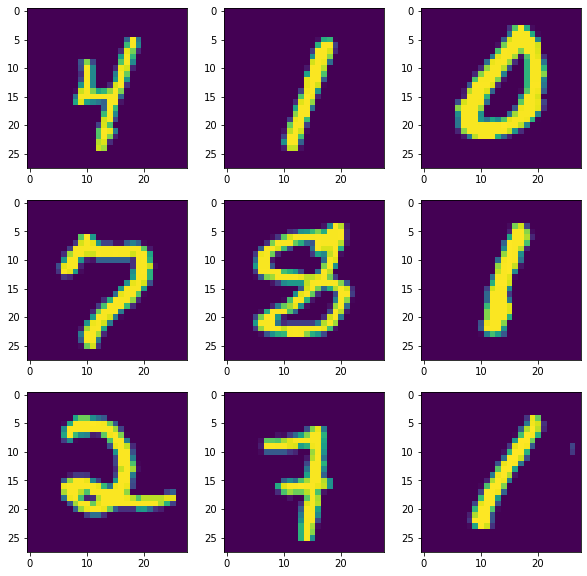

In [3]:
fig,ax = plt.subplots(3,3,figsize = (10,10))
i = 0
index = 0
for image,label in train_set.take(9):
    ax[index,i].imshow(image)
    if i == 2:
        index += 1
        i = 0
        continue
    i += 1




In [4]:
#shuffle and batch the datasets
train_set_size = train_set.cardinality()
valid_set_size = valid_set.cardinality()
test_set_size = test_set.cardinality()

In [5]:
train_set = train_set.shuffle(1000)
valid_set = valid_set.shuffle(1000)
test_set = test_set.shuffle(1000)

In [6]:
#preprocess 
#includes data augmentation to randomly crop
import cv2
def preprocess_augment(image,label,rotate):
    pixels = image.numpy()
    if rotate == 1:
        rotated = cv2.rotate(pixels, cv2.ROTATE_90_CLOCKWISE)
    tf_instance = tf.convert_to_tensor(rotated)
    rand_cropped = tf.image.random_crop(tf_instance,size = (20,20,1))
    resized_padded = tf.image.resize_with_pad(rand_cropped,target_height=28, target_width=28)
    return resized_padded,label

In [7]:
train_image_tensor = tf.TensorArray(tf.uint8,size = train_set.cardinality(), clear_after_read=False)
train_label_tensor = tf.TensorArray(tf.int64,size = train_set.cardinality(), clear_after_read=False)

In [34]:
images_np = np.zeros(shape = [45000,28,28,1])
label_np = np.zeros(shape = [45000])
i = 0
""" for image,label in train_set:
    train_image_tensor = train_image_tensor.write(i,image)
    train_label_tensor = train_label_tensor.write(i,label)
    i += 1 """
for image,label in train_set:
    images_np[i,:,:,:] = image.numpy()
    label_np[i] = label

In [9]:
train_image_tensor.size().numpy()

45000

#making batches of the data
train_set = train_set.batch(32)
valid_set = valid_set.batch(32)
test_set = test_set.batch(32)

In [10]:
random_angles = tf.random.uniform(shape = (train_image_tensor.size().numpy(),),minval = -np.pi/4, maxval = np.pi/4)

In [11]:
random_angles

<tf.Tensor: shape=(45000,), dtype=float32, numpy=
array([ 0.33598858,  0.30738944,  0.52393025, ..., -0.068335  ,
        0.18068916, -0.24824947], dtype=float32)>

In [12]:
import tensorflow as tf

In [32]:
images_np[0]

(28, 28, 1)

In [36]:
label_np.shape

(45000,)